# Project - Bike Rental Count

In [1]:
# As always, let's import all the required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
# Setting the working directory

os.chdir(r"C:\Users\Purushottam\Desktop\Projects")

In [3]:
# Checking the current working directory

os.getcwd()

'C:\\Users\\Purushottam\\Desktop\\Projects'

In [4]:
# Importing csv file into Jupyter notebook

day = pd.read_csv(r"C:\Users\Purushottam\Desktop\Projects\day.csv")

In [5]:
# Let's have a look at the first five rows of the imported dataset

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Our objective of this project is - Predication of bike rental count on daily based on the environmental and seasonal settings.

## The flow we are gong to work is - 1) Exploratory Data Analysis, 2) Data pre-Processing, 3) Model Development, 4) Model Evaluation, 5) Result - choosing the best model with lowest MAPE and R-square > 80%




# Exploratory Data Analysis

In [6]:
# Let's get started with Exploratory Data Analysis

#Type of DataFrame
print(type(day))

<class 'pandas.core.frame.DataFrame'>


In [7]:
# Knowing Data Types of Varaibles

print(day.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
# Have a look at the dimension of the dataset

print(day.shape)

(731, 16)


In [9]:
# Index ranges from 0 to 731 

print(day.index)

RangeIndex(start=0, stop=731, step=1)


In [10]:
# Total 16 columns are present

print(day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [11]:
# Gives us the unique values present in each variable

print(day.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [12]:
# It's time for us to remove variables (if any), which don't add any meaning

# In our data, instant can be dropped as it simply represents the index

# Next, dteday can also be neglected as we are not dealing with time series analysis

# Finally, let's delete casual and registered variables, as our dependent variable is the total of the former variables

day = day.drop(day.columns[[0, 1, 13, 14]], axis = 1)

print(day.shape)

(731, 12)


In [13]:
# If we observe the names, they are given with shortcut words. Let's change it for our convenience

day = day.rename(columns = {'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'temp': 'temperature', 
                            'hum': 'humidity', 'cnt': 'count'})

# We have changed the names and let's have a look on this

print(day.columns)

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')


In [14]:
# It's time to divide our variables into numeric(num_var) and categorical(cat_var), as we are going -
# For Data pre processing in the next step

num_var = ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

cat_var = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

# It's time for DATA PRE PROCESSING

## We will start with Missing Value Analysis

In [15]:
# Line of code to know the sum of missing values in dataset

day.isnull().sum()

season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
count          0
dtype: int64

### We don't have any missing vlaues in the dataset

## Next, we are going to check for OUTLIERS

temperature


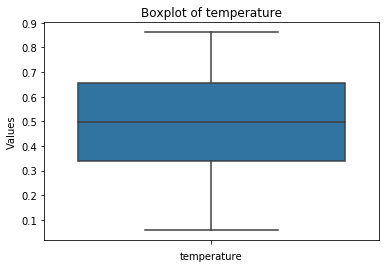

atemp


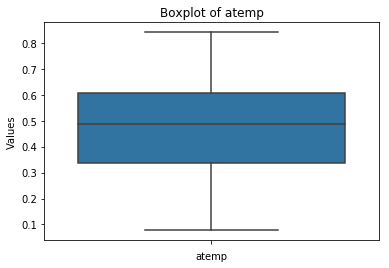

humidity


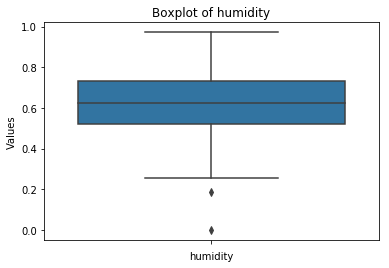

windspeed


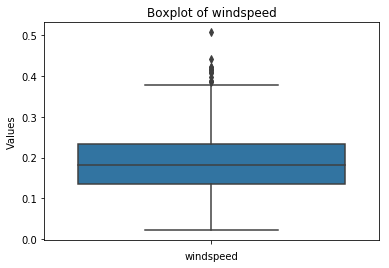

count


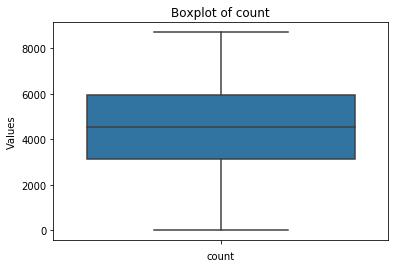

In [16]:
for i in num_var:
    print(i)
    sns.boxplot(y = day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

### We can observe outliers in windspeed and humidity variables.

In [17]:
# In this project, we are going to impute the ouliers, but before that, let's obtain the outliers

# Now, we have to calculate Inner Fence, Outer Fence, and IQR

for i in num_var:
    print(i)
    q75, q25 = np.percentile(day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# Let's go ahead by replacing outliers with NA

    day.loc[day[i]<Innerfence, i] = np.nan
    day.loc[day[i]>Upperfence, i] = np.nan

temperature
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
humidity
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
count
Innerfence= -1054.0
Upperfence= 10162.0
IQR =2804.0


In [18]:
day.isna().sum()

season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weather         0
temperature     0
atemp           0
humidity        2
windspeed      13
count           0
dtype: int64

In [19]:
# We have total 15 outliers. Now, we are going to use Median to impute the values.

day['humidity'] = day['humidity'].fillna(day['humidity'].median())
day['windspeed'] = day['windspeed'].fillna(day['windspeed'].median())

In [20]:
# No NA values now

day.isna().sum()

season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
count          0
dtype: int64

## Let's go for DATA UNDERSTANDING

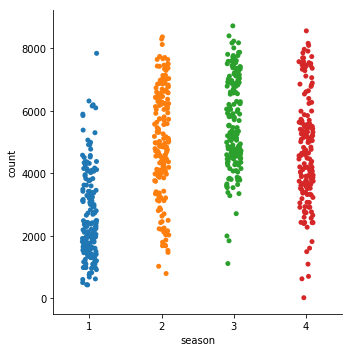

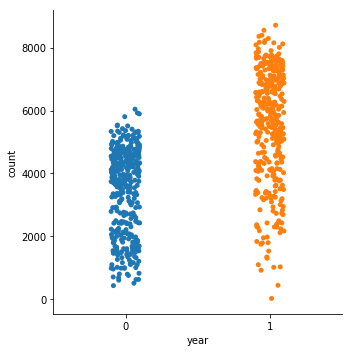

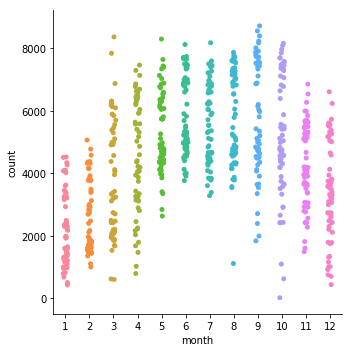

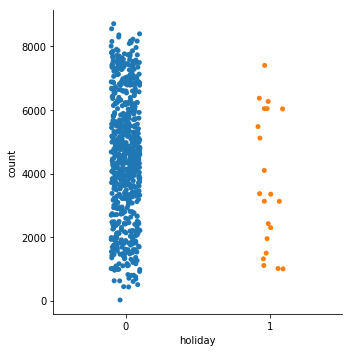

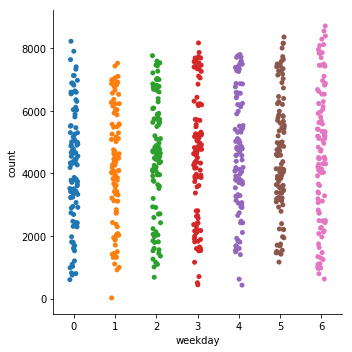

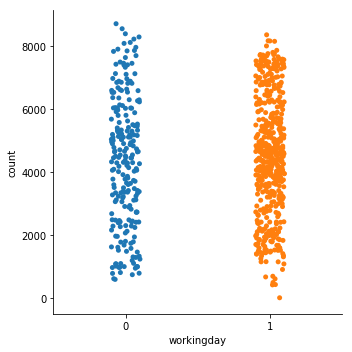

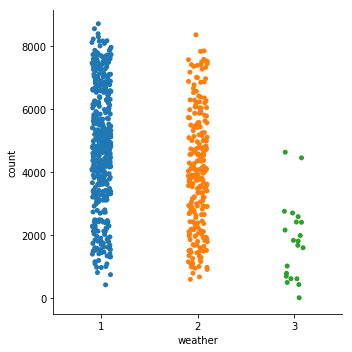

In [21]:
for i in cat_var:
    sns.catplot(x = i, y = "count", data=day)
    figname = str(i)+'.pdf'
    plt.savefig(figname)

### Season 2, 3 and 4 has the highest count
### Year 1 has high count than 0
### Months 3 to 10 has got pretty good count
### Obviously on holidays the count is higher than non-holidays
### In weekdays, 0 and 6 has the highest count
### In weather, 1 has the highest count

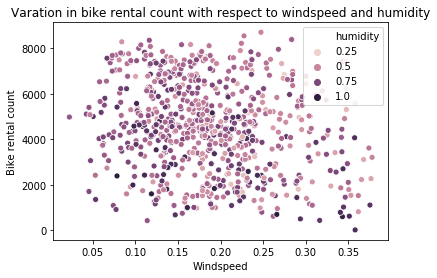

In [22]:
ax = sns.scatterplot(x="windspeed", y="count", hue="humidity",
                     data=day)

plt.title("Varation in bike rental count with respect to windspeed and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Windspeed")
plt.savefig('Bike count with windspeed and humidity.pdf')

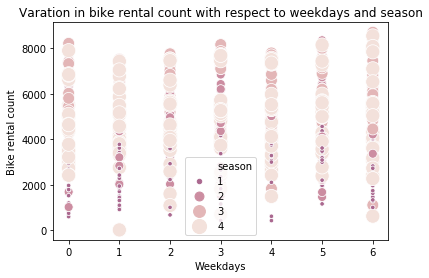

In [23]:
cmap = sns.cubehelix_palette(dark=.9, light=.5, as_cmap=True)

ax = sns.scatterplot(x="weekday", y="count",
            hue="season", size="season", sizes = (20, 200), palette=cmap,
             data=day)

plt.title("Varation in bike rental count with respect to weekdays and season")
plt.ylabel("Bike rental count")
plt.xlabel("Weekdays")
plt.savefig('Bike count with weekdays and season.pdf')

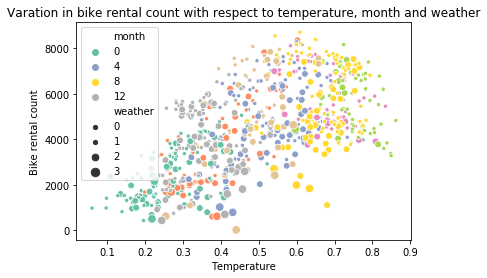

In [24]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x="temperature", y="count",
                      hue="month", size="weather",
                      palette="Set2",
                      data=day)

plt.title("Varation in bike rental count with respect to temperature, month and weather")
plt.ylabel("Bike rental count")
plt.xlabel("Temperature")
plt.savefig('Bike count with temperature, month and weather.pdf')

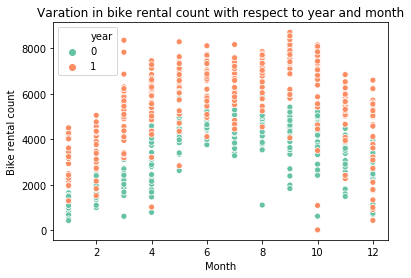

In [25]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x="month", y="count",
                      hue="year",
                      palette="Set2",
                      data=day)

plt.title("Varation in bike rental count with respect to year and month")
plt.ylabel("Bike rental count")
plt.xlabel("Month")
plt.savefig('Bike count with month and year.pdf') 

### In varation in bike rental count with respect to windspeed and humidity, count is high when windspeed is from 0.10 to 0.25 and humidity is from 0.5 to 0.75

### In varation in bike rental count with respect to weekdays and season, count is high in 4th season and 1st and 6th weekdays 

### In varation in bike rental count with respect to temperature, month and weather, count is high when temperature is from 0.5 to 0.8, in 8th month and weather is 0.

### In, varation in bike rental count with respect to year and month, count is high in year 1, particularly from season 3 to 12 excluding 9 

# Now, let's move to FEATURE SELECTION

In [26]:
# In Feature Selection, we perform Correlation Analysis and Anova test to find out the varaibl 
# -es which are to be excluded before feeding to the model

# Correlation Analysis is performed between num_var (numeirc independent variables) & count(continuous target variable)

day_cor = day.loc[:, num_var]

# line of code to generate the corrleation

cor_result = day_cor.corr()

print(cor_result)

             temperature     atemp  humidity  windspeed     count
temperature     1.000000  0.991702  0.123723  -0.138937  0.627494
atemp           0.991702  1.000000  0.137312  -0.164157  0.631066
humidity        0.123723  0.137312  1.000000  -0.200237 -0.121454
windspeed      -0.138937 -0.164157 -0.200237   1.000000 -0.215203
count           0.627494  0.631066 -0.121454  -0.215203  1.000000


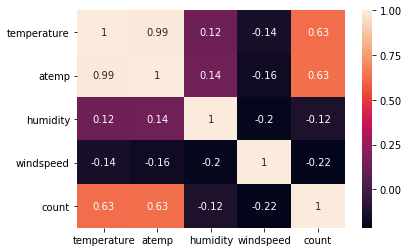

In [27]:
ax = sns.heatmap(cor_result, annot=True)

### From the analysis diagram, we can understand that, temperature and atemp are highly correlated with each other.

In [28]:
# Anova Test is performed between cat_var (categorical independent variables) & count(continuous target variable) 

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_var:
    mod = ols('count' + '~' + i, data = day).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
year      8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
month     2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                sum_sq     df          F   

### From the result, we can observe, holiday, weekday and workingday has p value > 0.05, by which, we accept null hypothesis.

In [29]:
# Deleting the below given continuous and categorical variables from da-
# -y, as we found out they won't add any value to the model - Dimension Reduction

day = day.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis = 1)

print(day.shape)

(731, 8)


In [30]:
# Now, what are the numeric and categorical variables left with us

num_var = ["temperature","humidity","windspeed","count"]   # numeric variables

cat_var = ["season", "year", "month", "weather"]   # categorical variables

## Let's jump to FEATURE SCALING

temperature


C:\Users\Purushottam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


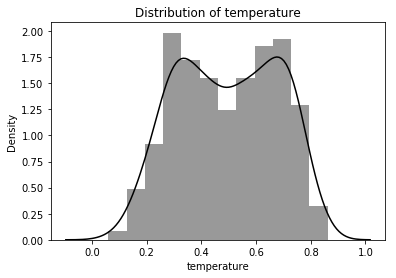

humidity


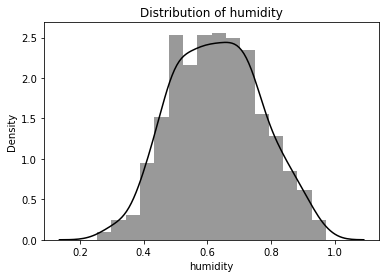

windspeed


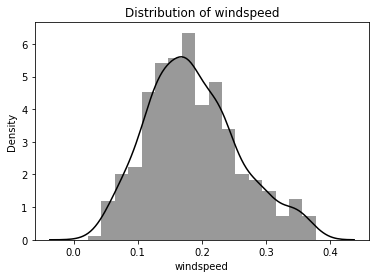

count


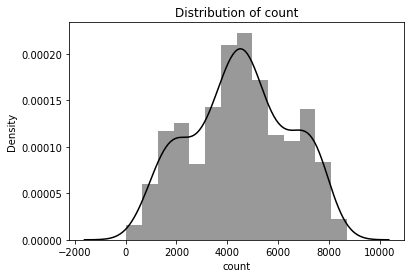

In [31]:
# We shall check for normality as Feature Scaling is all about normality

for i in num_var:
    print(i)
    sns.distplot(day[i], bins = 'auto', color = 'black')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

### As seen from above, the numeirc variables distribution are, approximately symmetric

In [32]:
# We also have a function describe, by which we can have a view on min and max values of each numeric variable

day.describe()

,season,year,month,weather,temperature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


### Temperature, windspeed and humidity, already seems to be normalized, so, no need for scaling

#       

# Now, We can go for MODEL DEVELOPMENT

In [33]:
# Let's create a copy of data for further reference

day2 = day.copy()
day = day2.copy()

In [34]:
# Time to create dummies - Why? because in regression analysis, it treats all independent variables as numerical

day = pd.get_dummies(day, columns = cat_var) 

day.shape

(731, 25)

In [35]:
day.head()

,temperature,humidity,windspeed,count,season_1,season_2,season_3,season_4,year_0,year_1,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
# Let's import few more libraries-

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr 

In [37]:
# Before going for Model Development, let's define two functions which are called as Error Metrics.

def MAPE(y_true, y_prediction):
    MAPE = np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return MAPE

def Rsquare(y_true, y_prediction):
    Rsquare = np.corrcoef(y_true,y_prediction)**2
    return Rsquare

In [38]:
# First let's separate, predictors and target

X = day.drop(['count'], axis = 1)
y = day['count']

In [39]:
# Now, as we know, we have to divide the data into train and test. So, let's go for that.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

#    

## We are going for LINEAR REGRESSION MODEL

In [40]:
# Let's import a library to perform Linear Regression

import statsmodels.api as sm

# Code for development of model

LRModel= sm.OLS(y_train, X_train).fit()

print(LRModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     140.2
Date:                Thu, 02 May 2019   Prob (F-statistic):          1.63e-203
Time:                        15:20:28   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     563   BIC:                             9566.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature  4807.6605    477.418     10.070      

In [41]:
# Predicting model on train data

LRTrain = LRModel.predict(X_train)

# Predicting model on test data

LRTest = LRModel.predict(X_test)

# Calculating MAPE for Train Data

LRMape_Train = MAPE(y_train, LRTrain) 

# Calculating MAPE for Test Data

LRMape_Test = MAPE(y_test, LRTest)

# Calculating Rsquare for Train Data

LRR2_Train = Rsquare(y_train, LRTrain)

LRR2_Train1 = LRR2_Train.ravel()

LRR2_Train2 = float(LRR2_Train1[1])

# Calculating Rsquare for Test Data

LRR2_Test = Rsquare(y_test, LRTest)

LRR2_Test1 = LRR2_Test.ravel()

LRR2_Test2 = float(LRR2_Test1[1])

print("MAPE for train data="+str(LRMape_Train))
print("MAPE for test data="+str(LRMape_Test))
print("Rsquare for train data="+str(LRR2_Train2))
print("Rsquare for test data="+str(LRR2_Test2))



MAPE for train data=44.44451231255284
MAPE for test data=18.80069603820695
Rsquare for train data=0.8327600660988468
Rsquare for test data=0.8436040019904952


In [42]:
# We are saving this to convert it into a dataframe later

fr1= {'Model Name': ['Linear Regression'],'MAPE_Train':[LRMape_Train],'MAPE_Test':[LRMape_Test],'R-squared_Train':[LRR2_Train2],
      'R-squared_Test':[LRR2_Test2]}

result1 = pd.DataFrame(fr1)

## It's time for DECISION TREE

In [43]:
# Let's import a library to perform Decision Tree

from sklearn.tree import DecisionTreeRegressor

# Code for development of model

DTModel = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Predicting model on train data

DTTrain = DTModel.predict(X_train)

# Predicting model on test data

DTTest = DTModel.predict(X_test)

# Calculating MAPE for Train Data

DTMape_Train = MAPE(y_train, DTTrain) 

# Calculating MAPE for Test Data

DTMape_Test = MAPE(y_test, DTTest)

# Calculating Rsquare for Train Data

DTR2_Train = Rsquare(y_train, DTTrain)

DTR2_Train1 = DTR2_Train.ravel()

DTR2_Train2 = float(DTR2_Train1[1])

# Calculating Rsquare for Test Data

DTR2_Test = Rsquare(y_test, DTTest)

DTR2_Test1 = DTR2_Test.ravel()

DTR2_Test2 = float(DTR2_Test1[1])

print("MAPE for train data="+str(DTMape_Train))
print("MAPE for test data="+str(DTMape_Test))
print("Rsquare for train data="+str(DTR2_Train2))
print("Rsquare for test data="+str(DTR2_Test2))

MAPE for train data=62.26013293672567
MAPE for test data=36.94809301452646
Rsquare for train data=0.6775629218593647
Rsquare for test data=0.6544606873373333


In [44]:
# We are saving this to convert it into a dataframe later

fr2 = {'Model Name': ['Decision Tree'],'MAPE_Train':[DTMape_Train],'MAPE_Test':[DTMape_Test],'R-squared_Train':[DTR2_Train2],
      'R-squared_Test':[DTR2_Test2]}
result2 = pd.DataFrame(fr2)

In [45]:
# We are saving this to convert it into a dataframe later

result =  result1.append(result2)

## Here we go for RANDOM FOREST

In [46]:
# Let's import a library to perform Random Forest

from sklearn.ensemble import RandomForestRegressor

# Code for development of model

RFModel = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Predicting model on train data

RFTrain = RFModel.predict(X_train)

# Predicting model on test data

RFTest = RFModel.predict(X_test)

# Calculating MAPE for Train Data

RFMape_Train = MAPE(y_train, RFTrain) 

# Calculating MAPE for Test Data

RFMape_Test = MAPE(y_test, RFTest)

# Calculating Rsquare for Train Data

RFR2_Train = Rsquare(y_train, RFTrain)

RFR2_Train1 = RFR2_Train.ravel()

RFR2_Train2 = float(RFR2_Train1[1])

# Calculating Rsquare for Test Data

RFR2_Test = Rsquare(y_test, RFTest)

RFR2_Test1 = RFR2_Test.ravel()

RFR2_Test2 = float(RFR2_Test1[1])

print("MAPE for train data="+str(RFMape_Train))
print("MAPE for test data="+str(RFMape_Test))
print("Rsquare for train data="+str(RFR2_Train2))
print("Rsquare for test data="+str(RFR2_Test2))

MAPE for train data=19.391452297764687
MAPE for test data=20.39585675198898
Rsquare for train data=0.9802057719850207
Rsquare for test data=0.8911757492580972


In [47]:
# We are saving this to convert it into a dataframe later

fr3 = {'Model Name': ['Random Forest'],'MAPE_Train':[RFMape_Train],'MAPE_Test':[RFMape_Test],'R-squared_Train':[RFR2_Train2],
      'R-squared_Test':[RFR2_Test2]}
result3 = pd.DataFrame(fr3)

In [48]:
# We are saving this to convert it into a dataframe later

result =  result.append(result3)

In [49]:
# Finally, here's the result

result

result.set_index('Model Name')

,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test
Model Name,,,,
Linear Regression,44.444512,18.800696,0.832760,0.843604
Decision Tree,62.260133,36.948093,0.677563,0.654461
Random Forest,19.391452,20.395857,0.980206,0.891176


### Finally, the last question - Which model we are going to freeze?

### The answer is - Random Forest as it has the lowest MAPE value = 20.751683 and high Rsqaure value = 0.882219

### Although, Linear Regression has lowest MAPE value than Random Forest, still we are going with Random Forest, because Rsqaure is our priority.
